In [1]:
import os
os.environ['DATA_READER_VENDOR'] = 'tiingo'
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Leveraged Debt', min_assets=.01, max_expense=1.2)
equities = screen_funds('Equities', 'Leveraged Equity', min_assets=.01, max_expense=1.2)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 90, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

4 54
from 2019-04-22 to 2019-07-17 - 58


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

32


,len,mean,std,shrp,yield,drawdown
symbol,,,,,,
NUGT,57,1.113260,2.269896,0.486774,99.736071,17.409012
JNUG,57,1.030215,2.514411,0.406410,99.482289,18.740157
GDXX,57,0.768743,1.515780,0.501662,61.971692,12.049794
BRZU,57,0.642313,2.076069,0.305375,42.794598,30.021142
RUSL,57,0.423950,1.075900,0.386297,20.922096,17.195886
TMF,57,0.322820,0.722764,0.435117,25.294891,9.112959
CURE,57,0.300993,1.063071,0.275296,21.680635,11.690274
FAS,57,0.233738,1.000583,0.225273,13.294919,14.333782
UBT,57,0.226068,0.482704,0.451073,16.904720,6.190063


evicted DRN 0.723 -0.145
evicted DFEN 0.682 -0.207
evicted CURE 0.795 -0.208
evicted RUSL 0.429 0.031
evicted GDXX 0.384 0.065
evicted BRZU 0.156 0.000
evicted UPW 0.382 -0.075
retry backlogs ['SPXL', 'TQQQ', 'UPRO', 'SSO', 'TMF', 'UDOW', 'NUGT', 'ROM', 'FAS', 'LBJ', 'URE', 'UXI', 'FINU', 'RXL', 'DZK', 'PPLC', 'DDM', 'TECL', 'QLD', 'UBT', 'JNUG', 'UYG'] at 0.805/-0.51 - 0.763
evicted URE 0.641 -0.065
evicted RXL 0.800 -0.199
evicted LBJ 0.430 0.028
evicted NUGT 0.387 -0.060
retry backlogs ['TQQQ', 'SPXL', 'TMF', 'UPRO', 'SSO', 'UDOW', 'ROM', 'FINU', 'UXI', 'UYG', 'DZK', 'PPLC', 'TECL', 'QLD', 'DDM', 'TYD', 'JNUG', 'FAS'] at 0.810/-0.52 - 0.745
evicted JNUG 0.366 -0.112
retry backlogs ['TQQQ', 'UYG', 'TMF', 'SPXL', 'UPRO', 'UDOW', 'SSO', 'UXI', 'DZK', 'TYD', 'UBT', 'QLD', 'ROM', 'PPLC', 'TECL', 'FINU', 'DDM', 'UCC'] at 0.815/-0.53 - 0.544
retry backlogs ['TQQQ', 'UYG', 'TMF', 'SPXL', 'UPRO', 'UDOW', 'SSO', 'UXI', 'DZK', 'TYD', 'UBT', 'QLD', 'ROM', 'PPLC', 'TECL', 'FINU', 'DDM', 'UCC'] a

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,57.0,0.159410,0.200270,-0.443638,0.001505,0.157173,0.283112,0.558999,0.754367,10.903054,2.193066
UST,57.0,0.128519,0.227562,-0.516983,-0.045927,0.150888,0.270657,0.756266,0.528144,8.960473,2.552925
TYD,57.0,0.187500,0.340999,-0.842235,-0.034237,0.192358,0.401153,1.173134,0.525419,12.837235,4.135922
UCC,57.0,0.158402,0.766016,-1.822810,-0.413442,0.245626,0.761772,2.097200,0.195908,10.349054,14.481513


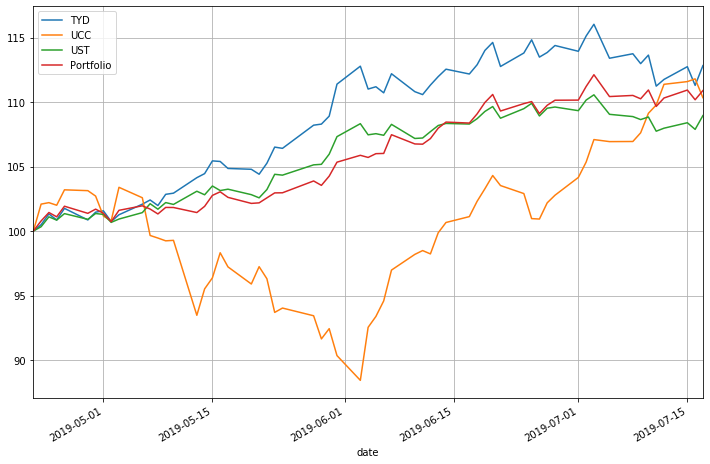

In [5]:
bounds = .16, .20
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(backlogs_pos_threshold=.8, _lambda=-1, bounds=bounds)
quote.setup_mask(['TYD', 'UST', 'UCC'])
sd.update(quote.optimize_portfolio(_lambda=-1, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=-1, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)